In [157]:
import cv2
from skimage import color
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [160]:
img = io.imread('train/00000.png')
img_ = color.rgb2gray(img_read)

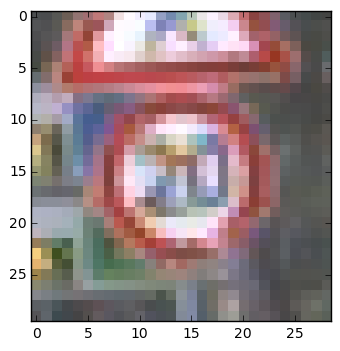

In [161]:
io.imshow(img)

In [162]:
I_x = np.zeros((img.shape[0] - 2, img.shape[1] - 2))
I_y = np.zeros((img.shape[0] - 2, img.shape[1] - 2))
s_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
s_y = np.array([[-1, 2, 1], [0, 0, 0], [-1, -2, -1]])

for i in range(I_x.shape[0]):
    for j in range(I_x.shape[1]):
        I_x[i][j] = np.sum(np.dot(s_x, img[i:i+3, j:j+3]))
        I_y[i][j] = np.sum(np.dot(s_y, img[i:i+3, j:j+3]))
G = np.sqrt(I_x ** 2 + I_y ** 2)
theta = np.abs(np.arctan2(I_x, I_y))


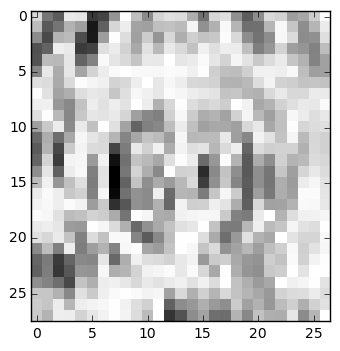

In [163]:
io.imshow(theta)

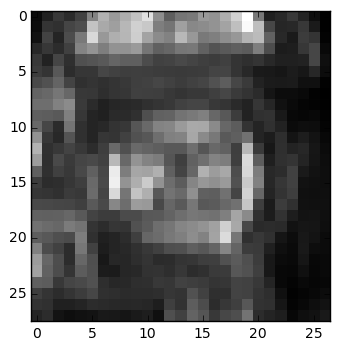

In [164]:
io.imshow(G)

In [48]:
cellRows = cellCols = 10
binCount = 8
h = I_x.shape[0]
w = I_x.shape[1]
img_hists = np.zeros((np.ceil(h * 1. / cellRows), np.ceil(w * 1. / cellCols), binCount))
print img_hists.shape
for i in xrange(h):
    for j in xrange(w):
        a = theta[i][j] * binCount / np.pi
        img_hists[i / cellRows][j / cellCols][a] += G[i][j]
        

/home/sonya/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/sonya/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(53, 60, 8)


In [68]:
blockRowCells = blockColCells = 10
stepX = stepY = 3
eps = 1e-10
res = []
blocks = np.zeros((np.ceil(img_hists.shape[0] * 1. / blockRowCells), np.ceil(img_hists.shape[1] * 1. / blockColCells)))
for i in xrange(0, img_hists.shape[0], stepX):
    for j in xrange(0, img_hists.shape[1], stepY):
        v = np.concatenate(img_hists[i : i + blockRowCells, j : j + blockColCells, :])
        res.append(v / np.sqrt(np.sum(v ** 2) + eps))
descr = np.concatenate(res)

/home/sonya/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [169]:
def extraxt_hog(img, cellRows=3, cellCols=3, binCount=8, blockRowCells=4, blockColCells=4, step_x=2, step_y=2, eps=1e-10): 
    I_x = np.zeros((img.shape[0] - 2, img.shape[1] - 2))
    I_y = np.zeros((img.shape[0] - 2, img.shape[1] - 2))
    h = I_x.shape[0]
    w = I_x.shape[1]
    s_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    s_y = np.array([[-1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    for i in range(h):
        for j in range(w):
            I_x[i][j] = np.sum(np.dot(img[i:i+3, j:j+3], s_x))
            I_y[i][j] = np.sum(np.dot(img[i:i+3, j:j+3], s_y))
    G = np.sqrt(I_x ** 2 + I_y ** 2)
    theta = abs(np.arctan2(I_y, I_x))
    
    img_hists = np.zeros((np.ceil(h * 1. / cellRows), np.ceil(w * 1. / cellCols), binCount))
    for i in xrange(h):
        for j in xrange(w):
            a = theta[i][j] * binCount / np.pi
            img_hists[i / cellRows][j / cellCols][a] += G[i][j]
            
    res = []
    for i in xrange(0, img_hists.shape[0], step_x):
        for j in xrange(0, img_hists.shape[1], step_y):
            v = np.concatenate(img_hists[i : i + blockRowCells, j : j + blockColCells, :])
            res.append(v / np.sqrt(np.sum(v ** 2) + eps))
    return np.concatenate(res)
    

In [170]:
res = extraxt_hog(img)

/home/sonya/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/sonya/.local/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [177]:
res.shape

(288, 8)

In [178]:
from sklearn import svm

In [ ]:
clf = LinearSVM()
clf.fit()